<a href="https://colab.research.google.com/github/tutork1/covid-data_analysis/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C_%EC%BD%94%EB%A1%9C%EB%82%98_%ED%99%95%EC%A7%84%EC%9E%90_%EB%B0%9C%EC%83%9D_%EB%8F%99%ED%96%A5_%EB%B6%84%EC%84%9D(_11_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url= "https://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'https://www.seoul.go.kr/coronaV/coronaStatus.do'

In [3]:
table = pd.read_html(url)

In [4]:
table[0]

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구
0,8314,5336,3655,5764,6938,4313,6491,3154,5320,3520,5069,5143,4605
1,+39,+52,+31,+51,+78,+19,+63,+31,+55,+31,+51,+25,+20
2,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,기타
3,3431,5132,3573,5189,8128,4233,6200,3352,5547,2320,2289,4745,9070
4,+37,+34,+26,+44,+46,+34,+44,+13,+58,+25,+16,+21,+61


In [5]:
# table 변수 안에 있는 table 태그의 값을 하나씩 읽어보며 확진자 목록이 있는 테이블을 가져옵니다.
table[2]

,구 분,합 계,9세 이하,10세~19세,20세~29세,30세~39세,40세~49세,50세~59세,60세~69세,70세 이상
0,확진자(명),1005,55.0,90.0,96.0,127.0,109.0,138.0,224.0,166.0
1,비율(%),100,5.5,9.0,9.6,12.6,10.8,13.7,22.3,16.5


In [6]:
df=table[5]
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [7]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [8]:
import requests
url= "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1&columns[0][data]=0"
#url= f"{url}&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=1&columns[1][name]=&columns[1][searchable]=true&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=2&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=3&columns[3][name]=&columns[3][searchable]=true&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=4&columns[4][name]=&columns[4][searchable]=true&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=5&columns[5][name]=&columns[5][searchable]=true&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=6&columns[6][name]=&columns[6][searchable]=true&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&order[0][column]=0&order[0][dir]=desc&start=0&length=100&search[value]=&search[regex]=true&_=1634131509151"
url = f"{url}&start=100&length=100&search%5Bvalue%5D=&search%5Bregex%5D=true&_=1634131509153"

response=requests.get(url)
response

<Response [200]>

In [9]:
data_json=response.json()
data_json

{'data': [["<p class='corona19_no'>130831</p>",
   '390742',
   '2021-11-12',
   '은평구',
   '-',
   "은평구 소재 어르신돌봄시설 관련('21.11.)",
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>130830</p>",
   '391802',
   '2021-11-12',
   '종로구',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>130829</p>",
   '391803',
   '2021-11-12',
   '종로구',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>130828</p>",
   '391804',
   '2021-11-12',
   '종로구',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>130827</p>",
   '390918',
   '2021-11-12',
   '성북구',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>130826</p>",
   '390805',
   '2021-11-12',
   '동대문구',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>130825</p>",
   '390920',
   '2021-11-12',
   '구로구',
   '-',
   '감염경로 조사중',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>130824</p>",
   '390925',
   '2021-11-12',
  

In [10]:
import time
from tqdm import trange

In [11]:
def get_seoul_covid19_100001_currnet(page_no):
  ''' 
  page no: 입력값으로 페이지 번호를 입력하면 해당 번호의 데이터를 가져옴
  start no: 입력받은  page_no로
  '''
  start_no=(page_no-1)*100
  url= f"https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw{page_no}"
  #url= f"{url}&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=1&columns[1][name]=&columns[1][searchable]=true&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=2&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=3&columns[3][name]=&columns[3][searchable]=true&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=4&columns[4][name]=&columns[4][searchable]=true&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=5&columns[5][name]=&columns[5][searchable]=true&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=6&columns[6][name]=&columns[6][searchable]=true&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&order[0][column]=0&order[0][dir]=desc&start=0&length=100&search[value]=&search[regex]=true&_=1634131509151"
  url = f"{url}&order%5B0%5D%5Bdir%5D=desc&start={start_no}&length=100"
  
  response=requests.get(url)
  data_json = response.json()
  return data_json

def get_seoul_covid19_1_10000(page_no):
  ''' 
  page no: 입력값으로 페이지 번호를 입력하면 해당 번호의 데이터를 가져옴
  start no: 입력받은  page_no로
  '''
  start_no=(page_no-1)*100
  url= f"https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw{page_no}"
  #url= f"{url}&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=1&columns[1][name]=&columns[1][searchable]=true&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=2&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=3&columns[3][name]=&columns[3][searchable]=true&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=4&columns[4][name]=&columns[4][searchable]=true&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=5&columns[5][name]=&columns[5][searchable]=true&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=6&columns[6][name]=&columns[6][searchable]=true&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&order[0][column]=0&order[0][dir]=desc&start=0&length=100&search[value]=&search[regex]=true&_=1634131509151"
  url = f"{url}&order%5B0%5D%5Bdir%5D=desc&start={start_no}&length=100"
  
  response=requests.get(url)
  data_json = response.json()
  return data_json

In [12]:
import time
#전체 페이지를 가져오기 전에 일부 페이지만 실행
page_list=[]
# 데이터가 제대로 로드 되는지 앞부분 3페이지 정도만 확인하고 전체페이지를 가져오도록 합니다.
# 처음부터 전체 페이지를 수집하면 중간에 오류가 나도 찾기가 어렵습니다.
# 일부만 우선 가져와 보고 잘 동작한다면 전체를 가져오도록 합니다.
all_page=3
for page_no in trange(all_page+1):
  one_page_data_json=get_seoul_covid19_100001_currnet(page_no)
  one_page_df=pd.DataFrame(one_page_data_json["data"])
  page_list.append(one_page_df)
  time.sleep(0.5)

100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


In [13]:
pd.concat(page_list)

,0,1,2,3,4,5,6
0,<p class='corona19_no'>130831</p>,390742,2021-11-12,은평구,-,은평구 소재 어르신돌봄시설 관련('21.11.),<b class=''>-</b>
1,<p class='corona19_no'>130830</p>,391802,2021-11-12,종로구,-,기타 확진자 접촉,<b class=''>-</b>
2,<p class='corona19_no'>130829</p>,391803,2021-11-12,종로구,-,기타 확진자 접촉,<b class=''>-</b>
3,<p class='corona19_no'>130828</p>,391804,2021-11-12,종로구,-,기타 확진자 접촉,<b class=''>-</b>
4,<p class='corona19_no'>130827</p>,390918,2021-11-12,성북구,-,기타 확진자 접촉,<b class=''>-</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>130536</p>,392105,2021-11-12,관악구,-,기타 확진자 접촉,<b class='status2'>-</b>
96,<p class='corona19_no'>130535</p>,392520,2021-11-12,종로구,-,감염경로 조사중,<b class='status2'>-</b>
97,<p class='corona19_no'>130534</p>,393032,2021-11-12,강서구,-,기타 확진자 접촉,<b class='status2'>-</b>
98,<p class='corona19_no'>130533</p>,391887,2021-11-12,성동구,-,감염경로 조사중,<b class='status2'>-</b>


In [14]:
def get_multi_page_list_100001_currnet(start_page,end_page=80):

  page_list=[]
  for page_no in trange(start_page,end_page+1):
    one_page_data_json =get_seoul_covid19_100001_currnet(page_no)
    if len(one_page_data_json["data"])>0:
        one_page_df =pd.DataFrame(one_page_data_json["data"])
        page_list.append(one_page_df)
        time.sleep(0.5)
    else:
      return page_list
  
  return page_list


def get_multi_page_list_1_10000(start_page,end_page=80):
    
  page_list=[]
  for page_no in trange(start_page,end_page+1):
    one_page_data_json =get_seoul_covid19_100001_currnet(page_no)
    if len(one_page_data_json["data"])>0:
        one_page_df =pd.DataFrame(one_page_data_json["data"])
        page_list.append(one_page_df)
        time.sleep(0.5)
    else:
      return page_list
  
  return page_list

In [15]:
page_list[:2]

[Empty DataFrame
 Columns: []
 Index: [],                                     0  ...                  6
 0   <p class='corona19_no'>130831</p>  ...  <b class=''>-</b>
 1   <p class='corona19_no'>130830</p>  ...  <b class=''>-</b>
 2   <p class='corona19_no'>130829</p>  ...  <b class=''>-</b>
 3   <p class='corona19_no'>130828</p>  ...  <b class=''>-</b>
 4   <p class='corona19_no'>130827</p>  ...  <b class=''>-</b>
 ..                                ...  ...                ...
 95  <p class='corona19_no'>130736</p>  ...  <b class=''>-</b>
 96  <p class='corona19_no'>130735</p>  ...  <b class=''>-</b>
 97  <p class='corona19_no'>130734</p>  ...  <b class=''>-</b>
 98  <p class='corona19_no'>130733</p>  ...  <b class=''>-</b>
 99  <p class='corona19_no'>130732</p>  ...  <b class=''>-</b>
 
 [100 rows x 7 columns]]

In [18]:
start_page=1
end_page= 610

page_list= get_multi_page_list_100001_currnet(start_page, end_page)
df_all_10001_current=pd.concat(page_list)

df_all_10001_current.columns = table[5].columns.tolist()
df_all_10001_current.head()

100%|█████████▉| 609/610 [18:10<00:01,  1.79s/it]


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>130831</p>,390742,2021-11-12,은평구,-,은평구 소재 어르신돌봄시설 관련('21.11.),<b class=''>-</b>
1,<p class='corona19_no'>130830</p>,391802,2021-11-12,종로구,-,기타 확진자 접촉,<b class=''>-</b>
2,<p class='corona19_no'>130829</p>,391803,2021-11-12,종로구,-,기타 확진자 접촉,<b class=''>-</b>
3,<p class='corona19_no'>130828</p>,391804,2021-11-12,종로구,-,기타 확진자 접촉,<b class=''>-</b>
4,<p class='corona19_no'>130827</p>,390918,2021-11-12,성북구,-,기타 확진자 접촉,<b class=''>-</b>


In [19]:
page_list

[                                    0  ...                  6
 0   <p class='corona19_no'>130831</p>  ...  <b class=''>-</b>
 1   <p class='corona19_no'>130830</p>  ...  <b class=''>-</b>
 2   <p class='corona19_no'>130829</p>  ...  <b class=''>-</b>
 3   <p class='corona19_no'>130828</p>  ...  <b class=''>-</b>
 4   <p class='corona19_no'>130827</p>  ...  <b class=''>-</b>
 ..                                ...  ...                ...
 95  <p class='corona19_no'>130736</p>  ...  <b class=''>-</b>
 96  <p class='corona19_no'>130735</p>  ...  <b class=''>-</b>
 97  <p class='corona19_no'>130734</p>  ...  <b class=''>-</b>
 98  <p class='corona19_no'>130733</p>  ...  <b class=''>-</b>
 99  <p class='corona19_no'>130732</p>  ...  <b class=''>-</b>
 
 [100 rows x 7 columns],
                                     0  ...                  6
 0   <p class='corona19_no'>130731</p>  ...  <b class=''>-</b>
 1   <p class='corona19_no'>130730</p>  ...  <b class=''>-</b>
 2   <p class='corona19_no'>

In [20]:
df_all=pd.concat(page_list)
df_all.shape

(60831, 7)

In [21]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [22]:
cols = df.columns.tolist()
cols

['연번', '환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황']

In [23]:
df_all.columns = cols
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>130831</p>,390742,2021-11-12,은평구,-,은평구 소재 어르신돌봄시설 관련('21.11.),<b class=''>-</b>
1,<p class='corona19_no'>130830</p>,391802,2021-11-12,종로구,-,기타 확진자 접촉,<b class=''>-</b>
2,<p class='corona19_no'>130829</p>,391803,2021-11-12,종로구,-,기타 확진자 접촉,<b class=''>-</b>
3,<p class='corona19_no'>130828</p>,391804,2021-11-12,종로구,-,기타 확진자 접촉,<b class=''>-</b>
4,<p class='corona19_no'>130827</p>,390918,2021-11-12,성북구,-,기타 확진자 접촉,<b class=''>-</b>


In [24]:
df_all.shape

(60831, 7)

In [25]:
import re
def extract_number(num_string):
  if type(num_string)==str:
    num_string=num_string.replace("corona19","")
    num=re.sub("[^0-9]","",num_string)
    num=int(num)
    return num
  else:
    return num_string

In [26]:
num_string ="<p class='corona19_no'>109940</p>"
extract_number(num_string)

109940

In [27]:
df_all["연번"]=df_all["연번"].map(extract_number)

In [28]:
df_all["연번"].head()

0    130831
1    130830
2    130829
3    130828
4    130827
Name: 연번, dtype: int64

In [29]:
def extract_hangeul(origin_text):
  subtract_text=re.sub("[^가-힣]","",origin_text)
  return subtract_text

In [30]:
extract_hangeul("<b class='status1'>기타</b>")

'기타'

In [31]:
extract_hangeul("<b class='status1'>퇴원</b>")

'퇴원'

In [32]:
extract_hangeul("<b class=''></b>")

''

In [33]:
#정규표현식으로 변경하는 방법도 있고  str.contains를 사용하는 방법도 있습니다.
#df.all["퇴원현황"]=df_all["퇴원현황"].map(extract_hangeul)
#df.all["퇴원현황"].value_counts()

In [34]:
df.all

<bound method DataFrame.all of Empty DataFrame
Columns: [연번, 환자, 확진일, 거주지, 여행력, 접촉력, 퇴원현황]
Index: []>

In [35]:
df_all["퇴원현황"].value_counts()

<b class='status1'>퇴원</b>    41956
<b class='status1'>-</b>     13799
<b class=''>-</b>             4179
<b class='status2'>-</b>       620
<b class='status2'>사망</b>      277
Name: 퇴원현황, dtype: int64

In [36]:
import pandas as pd
import numpy as np


In [37]:
df_all.loc[df_all["퇴원현황"].str.contains("퇴원"),"퇴원현황"]="퇴원"
df_all.loc[df_all["퇴원현황"].str.contains("사망"),"퇴원현황"]="사망"
df_all.loc[~df_all["퇴원현황"].str.contains("퇴원|사망"),"퇴원현황"] = np.nan
df_all["퇴원현황"].value_counts()

퇴원    41956
사망      277
Name: 퇴원현황, dtype: int64

In [38]:
df_all["퇴원현황"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
26     퇴원
27     퇴원
28     퇴원
29     퇴원
30     퇴원
Name: 퇴원현황, Length: 60831, dtype: object

In [39]:
last_date = df_all.iloc[0]["확진일"]
last_date

'2021-11-12'

In [41]:
#마지막 확진일을 파일명에 써주기 위해.을 _로 변경합니다.
#확장자와 구분이 쉽게 되도록 _로 변경합니다

date=last_date.replace(".","_")
date

'2021-11-12'

In [42]:
#파일명을 만들어 줍니다.
#file_name

file_name = f"seoul-covid19-{date}.csv"
file_name

'seoul-covid19-2021-11-12.csv'

In [43]:
#csv파일로 저장합니다.
df_all.to_csv(file_name,index=False)

In [44]:
#제대로 저장되었는지 확인합니다.
df = pd.read_csv(file_name, encoding="utf-8")
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,130831,390742,2021-11-12,은평구,-,은평구 소재 어르신돌봄시설 관련('21.11.),NaN
1,130830,391802,2021-11-12,종로구,-,기타 확진자 접촉,NaN
2,130829,391803,2021-11-12,종로구,-,기타 확진자 접촉,NaN
3,130828,391804,2021-11-12,종로구,-,기타 확진자 접촉,NaN
4,130827,390918,2021-11-12,성북구,-,기타 확진자 접촉,NaN


In [45]:
df["확진일"] = pd.to_datetime(df["확진일"])
df[["확진일"]].head()

,확진일
0,2021-11-12
1,2021-11-12
2,2021-11-12
3,2021-11-12
4,2021-11-12


In [47]:
# 월,주를 추출합니다.

df["월"] = df["확진일"].dt.month
df["주"] = df["확진일"].dt.week
df[["확진일", "월", "주"]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,확진일,월,주
0,2021-11-12,11,45
1,2021-11-12,11,45
2,2021-11-12,11,45
3,2021-11-12,11,45
4,2021-11-12,11,45


In [48]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df["월일"] = df["확진일"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[2]

488

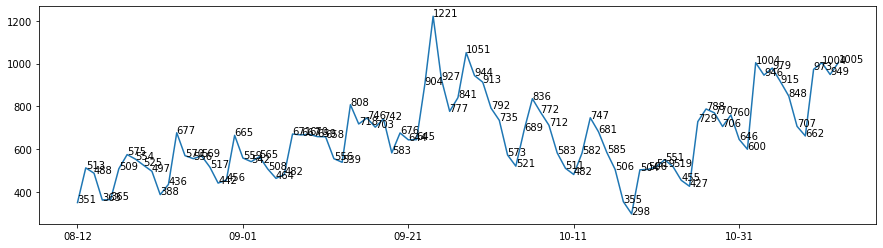

In [59]:
g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0, flags=flags)


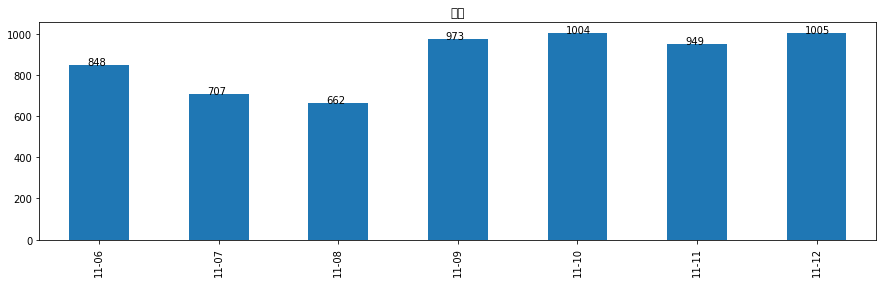

In [58]:
# 슬라이싱을 통해 최근 7일 데이터만 그립니다. 기능1

plt.rc("font",family="Malgun Gothic")
g = day_count[-7:].plot.bar(figsize=(15,4), title="제목")

for i in range(7):
    case_count = day_count[-7:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.1, y=case_count, s=case_count)

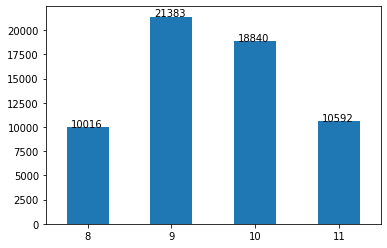

In [55]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다. 기능2

month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_

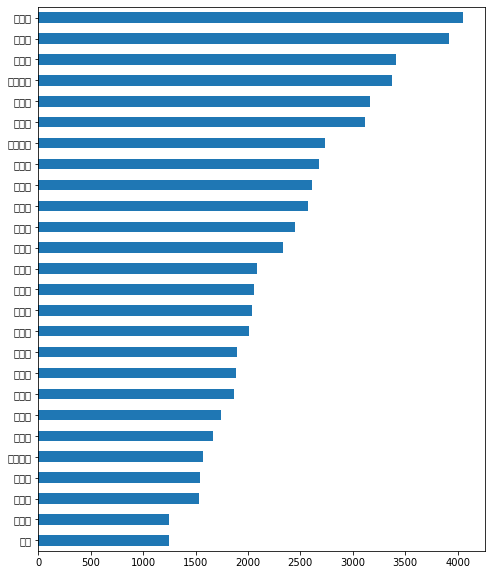

In [61]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.
#font 추가해야할듯

gu_count = df["거주지"].value_counts()

# 구별 확진자의 수를 시각화 합니다.

gu_count.sort_values().plot.barh(figsize=(10, 12))

# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.

gu = gu_count[:25].index

# 거주지가 서울이 아닌 지역을 따로 추출합니다.

set(gu_count.index) - set(gu)

# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.

df_gu = gu_count.reset_index()
df_gu.columns = ["구", "확진수"]

# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
df["지역"] = df["거주지"].map(lambda x : x if x in gu else "타지역")

# "지역" 컬럼으로 확진자 빈도수를 구합니다.
gu_etc_count = df["지역"].value_counts()

# 위에서 구한 빈도수를 막대그래프로 그립니다.
gu_etc_count.sort_values().plot.barh(figsize=(8, 10))
